# Conversion de fichiers PDF en fichiers TXT

## Imports

In [1]:
import os
import textract

# fichier numérisé et OCRisé (détection du texte et conversion)

## Lister les fichiers dans `data/pdf`

In [2]:
pdf_path = '../data/pdf'

pdfs = [] ##################################################### quelle différence en pdfs = [] ou pdfs = 0 ?? pdfs = [] pour ajouter des objets et pdfs = 0 pour compter?

for f in os.listdir(pdf_path): ############################### listdir = cd en bash?
    if os.path.isfile(os.path.join(pdf_path, f)): # parcourir l'ensemble des fichiers et si le fichier existe, le lister dans 'f' grâce au 'append'
        pdfs.append(f)
pdfs[:10]

['Bxl_1847_Tome_I1_Part_1.pdf',
 'Bxl_1847_Tome_I1_Part_2.pdf',
 'Bxl_1847_Tome_I1_Part_3.pdf',
 'Bxl_1847_Tome_I1_Part_4.pdf',
 'Bxl_1847_Tome_I1_Part_5.pdf',
 'Bxl_1848_Tome_I1_Part_1.pdf',
 'Bxl_1848_Tome_I1_Part_2.pdf',
 'Bxl_1848_Tome_I1_Part_3.pdf',
 'Bxl_1849_Tome_I1_Part_1.pdf',
 'Bxl_1849_Tome_I1_Part_2.pdf']

## Créer un répertoire TXT s'il n'existe pas encore

In [3]:
txt_path = '../data/txt'
if not os.path.exists(txt_path):
    os.mkdir(txt_path)

## Lister les fichiers dans `data/txt`

In [4]:
txts = []
for f in os.listdir(txt_path):
    if os.path.isfile(os.path.join(txt_path, f)):
        txts.append(f)
txts[:10]

['Bxl_1847_Tome_I1_Part_1.txt',
 'Bxl_1847_Tome_I1_Part_2.txt',
 'Bxl_1847_Tome_I1_Part_3.txt',
 'Bxl_1847_Tome_I1_Part_4.txt',
 'Bxl_1847_Tome_I1_Part_5.txt',
 'Bxl_1848_Tome_I1_Part_1.txt',
 'Bxl_1848_Tome_I1_Part_2.txt',
 'Bxl_1848_Tome_I1_Part_3.txt',
 'Bxl_1849_Tome_I1_Part_1.txt',
 'Bxl_1849_Tome_I1_Part_2.txt']

In [5]:
#  Lister les fichiers pdf déja téléchargés mais pas encore converti
not_converted_pdfs = []
for pdf in pdfs:
    file_name = os.path.splitext(pdf)[0] # ne prendre que le nom du fichier sans l'extension pdf
    if file_name + ".txt" not in txts: # si ce nom de fichier ne comprend pas l'extension 'txt'
        not_converted_pdfs.append(pdf) # alors l'ajouter dans la liste des fichier à convertir
print(len(not_converted_pdfs))
print(not_converted_pdfs[:10])

6
['Bxl_1947_Tome_II_Part_1.pdf', 'Bxl_1959_Tome_RptAn_Part_2.pdf', 'Bxl_1959_Tome_RptAn_Part_4.pdf', 'Bxl_1961_Tome_RptAn_Part_2.pdf', 'Bxl_1961_Tome_RptAn_Part_3.pdf', 'Bxl_1961_Tome_RptAn_Part_5.pdf']


## Convertir les fichiers PDFs en TXT

In [6]:
for pdf in not_converted_pdfs:
    try:
        text = textract.process(os.path.join(pdf_path, pdf)) # extraire le texte dans une variable
        with open(os.path.join(txt_path, f'{os.path.splitext(pdf)[0]}.txt'), 'wb') as output_file: # ouvrir l'emplacement et écrire le nom du fichier en ajoutant l'extension 'txt'
            output_file.write(text) ####################################################################### pourquoi 'open(os.path.join(), 'wb')' puis 'write' ??
    except:
        print("Error with following file:", pdf)

Error with following file: Bxl_1947_Tome_II_Part_1.pdf
Error with following file: Bxl_1959_Tome_RptAn_Part_2.pdf
Error with following file: Bxl_1959_Tome_RptAn_Part_4.pdf
Error with following file: Bxl_1961_Tome_RptAn_Part_2.pdf
Error with following file: Bxl_1961_Tome_RptAn_Part_3.pdf
Error with following file: Bxl_1961_Tome_RptAn_Part_5.pdf


## Créer un grand fichier 'corpus': commande bash

- `cat` permet d'imprimer le contenu de fichiers textes
- Un pattern (ici `../*.txt`) permet d'appliquer la commande sur tous les fichiers qui matchent
- `>` permet de rediriger le résultat de la commande précédente dans un fichier

Pour en savoir plus sur les flux de redirections :
https://openclassrooms.com/fr/courses/43538-reprenez-le-controle-a-laide-de-linux/40444-les-flux-de-redirection

In [9]:
!cat ../data/txt/*.txt > ../data/all.txt # en dehors du dossier txt ! pour ne pas mélanger

## Compter le nombre de mots dans l'ensemble du corpus

In [10]:
!wc ../data/all.txt

 20125553  93137806 460746924 ../data/all.txt


In [1]:
!wc -l ../data/all.txt

20125553 ../data/all.txt


In [2]:
!wc -w ../data/all.txt

93137806 ../data/all.txt


In [3]:
!wc -c ../data/all.txt

460746924 ../data/all.txt


On obtient ici, dans l'ordre, le nombre de lignes, de mots, d'octets.

Pour en savoir plus sur la commande wc: https://fr.wikipedia.org/wiki/Wc_(Unix)

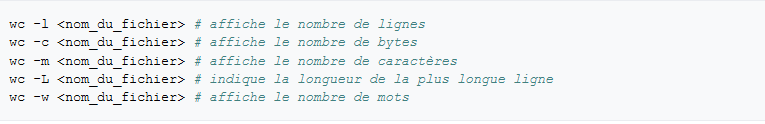